In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
## df = pd.read_csv("/content/drive/MyDrive/UoB Dissertation Folder/500_Reddit_users_posts_labels (1).csv")

In [ ]:
###df = pd.read_excel("/content/drive/MyDrive/UoB Dissertation Folder/500_Reddit_users_posts_labels (1).xlsx")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UoB Dissertation Folder/500_Reddit_users_posts_labels (2).csv")

In [ ]:
df.head()

,User,Post,Label
0,user-0,"['Its not a viable option, and youll be leavin...",Supportive
1,user-1,['It can be hard to appreciate the notion that...,Ideation
2,user-2,"['Hi, so last night i was sitting on the ledge...",Behavior
3,user-3,['I tried to kill my self once and failed badl...,Attempt
4,user-4,['Hi NEM3030. What sorts of things do you enjo...,Ideation


In [ ]:
df["Label"].value_counts()

Ideation      165
Supportive     99
Indicator      93
Behavior       73
Attempt        42
Name: Label, dtype: int64

In [ ]:
for Post in df['Post'][:5]:
  print("\n\n", Post)



 ['Its not a viable option, and youll be leaving your wife behind. Youd Pain her beyond comprehension.It sucks worrying about money, I know that first hand. It can definitely feel hopeless, as you seem to be Tired aware of. Your wife might need to chip in financially. I know time is an issue, but even 10-15 hours a Asthenia could alleviate a lot of the pressure. In the meantime, get your shit together - write that resume tomorrow. No excuses, get it done and send it out. Whether you believe in some sort of powerful being or force governing things or not, things really do work themselves out. This is a big test for you, and youll pull through. Just try to stay as positive as you can and everything will work out.']


 ['It can be hard to appreciate the notion that you could meet someone else who will make you happy when you are so deeply in love with your boyfriend. Your desires are set on him and not much else will make you happy at the moment. But over time the mind has a way of deal

In [ ]:
stop_words = set(stopwords.words('english'))

def text_cleaner(Post):
  #converting to lowercase
  newString = Post.lower()
  #removing links
  newString = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', newString)
  #removing text inside ()
  newString = re.sub(r'\([^)]*\)', '', newString)
  #removing text inside []
  newString = re.sub(r'\{[^)]*\}', '', newString)
  #fetching alhpabetic charaters
  newString = re.sub("[^a-zA-Z]", " ", newString)
  #removing stop words
  tokens = [w for w in newString.split() if not w in stop_words]
  long_words=[]
  for i in tokens:
    if len(i)>=4:
      long_words.append(i)
  return (" ".join(long_words)).strip()


In [ ]:
text1 = df['Post'][2]
clean_text1 = text_cleaner(text1)
print("Before cleaning:\n",text1)
print("After cleaning:\n",clean_text1)

Before cleaning:
 ['Hi, so last night i was sitting on the ledge of my window contemplating whether or not i should jump. My dad had just choked me and told me that i should get out of the house, and earlier he had called me a bum. To me it seemed as though there was no reason to keep living, the people that are supposed to care about you the most dont. But one thing echoed in my mind, and that was something one of my best friends had told me: you dont help yourself. And reading through your post made me feel like thats also the case for you. Maybe instead of cutting things out, add some things into your life. Go outside, take a deep breath, and talk to somebody new. I dont know your financial situation, but if you can take lessons, join a gym, take classes, the most important thing is you do something for YOU. Be a little selfish, take yourself out to eat in your favorite restaurant once in a while. Try some new food, but do something. If you do read this, please know a lot of people 

In [ ]:
text1 = df['Post'][2]
clean_text1 = text_cleaner(text1)
print("Before cleaning:\n", text1)
print("After cleaning:\n", clean_text1)

Before cleaning:
 ['Hi, so last night i was sitting on the ledge of my window contemplating whether or not i should jump. My dad had just choked me and told me that i should get out of the house, and earlier he had called me a bum. To me it seemed as though there was no reason to keep living, the people that are supposed to care about you the most dont. But one thing echoed in my mind, and that was something one of my best friends had told me: you dont help yourself. And reading through your post made me feel like thats also the case for you. Maybe instead of cutting things out, add some things into your life. Go outside, take a deep breath, and talk to somebody new. I dont know your financial situation, but if you can take lessons, join a gym, take classes, the most important thing is you do something for YOU. Be a little selfish, take yourself out to eat in your favorite restaurant once in a while. Try some new food, but do something. If you do read this, please know a lot of people 

In [ ]:
cleaned_text=[]
for i in df['Post']:
    cleaned_text.append(text_cleaner(i))  

In [ ]:
df["Label"]

0      Supportive
1        Ideation
2        Behavior
3         Attempt
4        Ideation
          ...    
495    Supportive
496     Indicator
497           NaN
498       Attempt
499      Behavior
Name: Label, Length: 500, dtype: object

In [ ]:
## df.isnull().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(df['Label'])

In [ ]:
y

array([4, 2, 1, 0, 2, 4, 4, 2, 4, 2, 3, 4, 1, 2, 2, 1, 2, 1, 0, 2, 4, 2,
       2, 4, 0, 0, 5, 2, 2, 4, 0, 4, 2, 1, 1, 2, 2, 3, 2, 4, 4, 1, 2, 0,
       2, 2, 0, 2, 0, 4, 4, 2, 2, 3, 2, 4, 1, 2, 2, 1, 2, 0, 2, 4, 3, 1,
       1, 1, 3, 2, 1, 4, 4, 2, 3, 1, 5, 5, 3, 2, 4, 2, 0, 2, 1, 4, 4, 5,
       2, 3, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 4, 3, 1, 2, 1, 2, 1,
       5, 4, 2, 5, 3, 3, 2, 2, 3, 4, 3, 2, 2, 1, 0, 5, 2, 2, 5, 2, 2, 1,
       4, 1, 1, 2, 1, 3, 5, 2, 4, 2, 0, 2, 1, 3, 3, 0, 5, 3, 5, 3, 3, 2,
       3, 3, 1, 4, 2, 3, 2, 2, 4, 4, 5, 4, 0, 4, 2, 4, 3, 3, 2, 2, 5, 3,
       1, 2, 2, 2, 2, 2, 1, 4, 2, 3, 3, 1, 2, 3, 2, 4, 0, 4, 3, 1, 1, 3,
       4, 2, 1, 2, 4, 5, 2, 1, 5, 1, 4, 4, 1, 3, 2, 2, 3, 2, 2, 2, 0, 2,
       2, 1, 2, 1, 1, 4, 2, 2, 3, 3, 4, 4, 1, 3, 2, 3, 4, 0, 0, 3, 2, 3,
       2, 4, 4, 2, 2, 5, 2, 4, 2, 1, 2, 3, 0, 3, 1, 2, 3, 2, 4, 1, 4, 4,
       3, 3, 3, 1, 5, 4, 3, 0, 2, 2, 0, 0, 2, 2, 1, 3, 3, 1, 1, 3, 2, 2,
       1, 3, 3, 2, 4, 2, 0, 5, 3, 4, 5, 0, 2, 3, 2,

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(cleaned_text,y,test_size=0.3,random_state=0,shuffle=True)

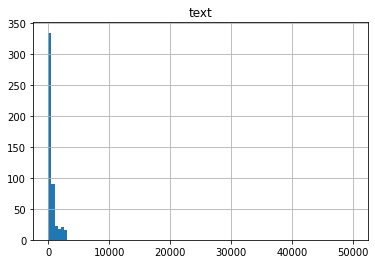

In [ ]:
import matplotlib.pyplot as plt

text_word_count = []

#populate the lists with sentence lengths
for i in cleaned_text:
      text_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count})

length_df.hist(bins = 100, range=(0,50000))
plt.show()

In [ ]:
max_len=200

In [ ]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
#creating index for a wor
tokenizer.fit_on_texts(list(x_tr))

#converting word seq to integer seq
x_tr    =   tokenizer.texts_to_sequences(x_tr) 
x_val   =   tokenizer.texts_to_sequences(x_val)

#padding up with zero 
x_tr    =   pad_sequences(x_tr,  maxlen=max_len, padding='post')
x_val   =   pad_sequences(x_val, maxlen=max_len, padding='post')

vocabulary   =  len(tokenizer.word_index) +1
print("Vocabulary size:",vocabulary)

Vocabulary size: 13120


In [ ]:
#sequence encoding and padding
x_tr[150]

array([ 498,  244,   68, 9345, 1399, 1569,  683, 1548,  517,  345,  333,
        788, 2306,   95, 1724,  589,  579,  307,   39,  579,   25, 1120,
       1142,  979,  197,   27,   46,   12,    1,   13,    2,    7,  213,
         81,    2,   13,   19, 1642,   28,  787,  546,    3,   43,  103,
       1013,  391,  612,  408,   26,    3,   32,  643, 3714,   17,   15,
         12,  189,  103, 4807, 4381,   12,    7,    1,   13,    2,  111,
         82,  373,   47,   23,   26,   82, 2668, 2043,  298,  398,  756,
       9346,  436,   10,   36,  188,  141, 2560,   67,  150,  352, 6232,
         61,   26,   76,   89,   94,    1, 1526,  318,   11,  138,  520,
        529,  146,   27,  845,   12,   93,   21,  424,  661,  430,  106,
         75, 3472,  196,  374,  126,  283, 2858,  161,  768,   16, 4014,
         36, 6233,  175,  113,   48,  384,  693,  915,   16,   24,  133,
        424,   16,   48,  816,  453,  389,  290,    7,   12,  111,   13,
        678,   93, 1145,  352,  436,   24,   12,  5

In [ ]:
#showing word index 
tokenizer.word_index

{'dont': 1,
 'know': 2,
 'people': 3,
 'life': 4,
 'feel': 5,
 'think': 6,
 'want': 7,
 'youre': 8,
 'like': 9,
 'would': 10,
 'help': 11,
 'things': 12,
 'really': 13,
 'time': 14,
 'behavior': 15,
 'going': 16,
 'hyperactive': 17,
 'even': 18,
 'something': 19,
 'make': 20,
 'better': 21,
 'much': 22,
 'need': 23,
 'good': 24,
 'someone': 25,
 'talk': 26,
 'cant': 27,
 'could': 28,
 'find': 29,
 'thats': 30,
 'right': 31,
 'take': 32,
 'friends': 33,
 'still': 34,
 'well': 35,
 'depression': 36,
 'work': 37,
 'thing': 38,
 'also': 39,
 'never': 40,
 'anything': 41,
 'maybe': 42,
 'tell': 43,
 'person': 44,
 'give': 45,
 'love': 46,
 'always': 47,
 'back': 48,
 'might': 49,
 'hope': 50,
 'feeling': 51,
 'live': 52,
 'years': 53,
 'keep': 54,
 'doesnt': 55,
 'didnt': 56,
 'care': 57,
 'hard': 58,
 'sure': 59,
 'please': 60,
 'suicide': 61,
 'understand': 62,
 'long': 63,
 'though': 64,
 'said': 65,
 'happy': 66,
 'around': 67,
 'look': 68,
 'many': 69,
 'pain': 70,
 'world': 71,
 'fami

In [ ]:
from keras.utils.np_utils import to_categorical
y_tr=to_categorical(y_tr,num_classes=9)
y_val=to_categorical(y_val,num_classes=9)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, GRU
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
K.clear_session()

# LSTM model
model=Sequential()
model.add(Embedding(vocabulary,100,input_length=max_len,trainable=True, mask_zero=True)) 
model.add(LSTM(300,dropout=0.1, recurrent_dropout=0.2)) 
model.add(Dense(64,activation='relu')) 
model.add(Dense(9,activation='softmax')) 
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          1312000   
                                                                 
 lstm (LSTM)                 (None, 300)               481200    
                                                                 
 dense (Dense)               (None, 64)                19264     
                                                                 
 dense_1 (Dense)             (None, 9)                 585       
                                                                 
Total params: 1,813,049
Trainable params: 1,813,049
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=["acc"]) 

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)  
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)  

In [ ]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=700,epochs=100,validation_data=(np.array(x_val),np.array(y_val)),verbose=1,callbacks=[es,mc])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 2.1983 - acc: 0.0514
Epoch 1: val_loss improved from inf to 2.19141, saving model to best_model.h5
1/1 [==============================] - 25s 25s/step - loss: 2.1983 - acc: 0.0514 - val_loss: 2.1914 - val_acc: 0.3067
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 2.1887 - acc: 0.3914
Epoch 2: val_loss improved from 2.19141 to 2.18130, saving model to best_model.h5
1/1 [==============================] - 9s 9s/step - loss: 2.1887 - acc: 0.3914 - val_loss: 2.1813 - val_acc: 0.3133
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 2.1770 - acc: 0.3371
Epoch 3: val_loss improved from 2.18130 to 2.16402, saving model to best_model.h5
1/1 [==============================] - 8s 8s/step - loss: 2.1770 - acc: 0.3371 - val_loss: 2.1640 - val_acc: 0.3200
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 2.1579 - acc: 0.3343
Epoch 4: val_loss improved from 2.16402 to 2.12833, savi

In [ ]:
score, acc = model.evaluate(x_val, y_val,verbose=2, batch_size= 256)
print('test accuracy:', acc)

1/1 - 1s - loss: 1.8579 - acc: 0.3200 - 848ms/epoch - 848ms/step
test accuracy: 0.3199999928474426


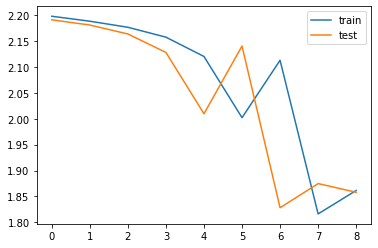

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from keras.models import load_model
model = load_model('best_model.h5')

In [ ]:
print('test accuracy:', acc)

test accuracy: 0.3199999928474426


In [ ]:
predictions = (model.predict(x_val) > 0.5).astype("int32")

In [ ]:
print("prediction")

prediction
